# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [2]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

38916


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'higher_order_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [7]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [8]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [9]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load AB assignment

Data below can be generated from notebook:

[4_ab_compartment_by_ensemble_assignment_by_CG](4_ab_compartment_by_ensemble_assignment_by_CG.ipynb)

In [11]:
AB_summary_df = pd.read_csv(os.path.join(output_analysis_folder,
                                         'AB_assignment_CG_by_ensemble_equalAB.csv'), index_col=0)

AB_summary_df

,Astro,Endo,L2/3 IT,L4/5 IT,L5 ET,L5 IT,L5/6 NP,L6 CT,L6 IT,L6b,...,Micro,OPC,Oligo,Peri,Pvalb,SMC,Sncg,Sst,VLMC,Vip
loci_name,,,,,,,,,,,,,,,,,,,,,
chr1_3742742_3759944,B,B,B,B,A,B,B,B,B,B,...,B,A,B,B,B,B,B,B,B,B
chr1_6245958_6258969,B,A,B,B,A,B,B,B,B,B,...,B,A,B,B,A,A,B,B,B,A
chr1_8740008_8759916,B,B,B,B,A,B,B,B,B,B,...,B,A,B,B,B,B,B,B,B,B
chr1_9627926_9637875,B,B,B,B,A,B,B,B,B,B,...,A,A,B,B,B,B,B,B,B,A
chr1_9799472_9811359,A,A,A,B,A,B,B,B,B,B,...,A,A,A,A,B,B,A,B,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_163750534_163758706,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,...,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned
chrX_166247682_166259932,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,...,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned
chrX_167157164_167167452,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,...,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned


# Load spatial distances and other info

In [12]:
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')
class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


In [13]:
class_2_info_filename = os.path.join(input_folder, 'subclass_2_cellInfo.pkl')
class_2_infoDict = pickle.load(open(class_2_info_filename, 'rb'))
# inspect cell numbers for quality control
for _cls, _info_list in class_2_infoDict.items():
    print(_cls, len(_info_list))

Oligo 6605
L5 IT 3337
Micro 1836
Peri 957
Endo 3738
Astro 4970
OPC 1452
L6 CT 5602
L5 ET 1624
L5/6 NP 784
Pvalb 1317
L6 IT 2428
Lamp5 540
L6b 1044
Sst 1031
SMC 632
L4/5 IT 3388
L2/3 IT 3966
Vip 422
Sncg 173
VLMC 494


# Load RNA for annotation

Example can be generated from the notebook below

[0_locus_annotation/scripts/4_subclass_atac_and_rna_means_by_loci](../0_locus_annotation/scripts/4_subclass_atac_and_rna_means_by_loci.ipynb)

In [14]:
locus_info_folder = r'L:\Shiwei\postanalysis_2024\v0\locus_annotation\analysis'

import tqdm
sel_class_list = ['L4/5 IT','Astro','Oligo']
ref_measure_dict_byGroup = {}

for _class in tqdm.tqdm(sel_class_list):
    _class_name = _class.replace(' ','_').replace('/','_')
    #print(_class_name)
    rna_atac_fname = os.path.join(locus_info_folder,f'subclass_{_class_name}_snATAC_snRNA_mean_by_loci.csv')
    if os.path.exists(rna_atac_fname):
        rna_atac_df = pd.read_csv(rna_atac_fname).set_index('loci_name', drop=True)
        ref_measure_dict_byGroup[_class] = rna_atac_df[[c for c in rna_atac_df.columns if 'mean' in c]]
        

ref_measure_dict_byGroup[_class].head()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 41.67it/s]


,mean_rna_2X_2000kb,mean_ATAC_2X_2000kb
loci_name,,
chr1_3742742_3759944,2.923077,1.850186
chr1_6245958_6258969,17.216783,2.510552
chr1_8740008_8759916,3.748252,2.366535
chr1_9627926_9637875,3.503497,2.211735
chr1_9799472_9811359,3.503497,2.240492


# Plot absolute distance map change with transcription activity

In [15]:
from ImageAnalysis3.structure_tools import distance

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook_df, codebook_df, sort_by_region=False)## load codebook


In [16]:
sel_codebook = codebook_df.copy(deep=True)
sort_by_region= False


# whether to normalize transcription from 0 to 1
normalize_RNA = False

# whether and how to normalize between cell types (e.g., regress out absolute chromosome size difference)
normalize_btw_celltype = False
norm_btw_celltype_method = 'regression'
norm_btw_celltype_method = 'median'

fit_deg = 2
# common celltype to normalize
common_celltype = 'Endo'



In [17]:
# generate genomic distance matrices for plotting later if needed
from scipy.spatial.distance import squareform, pdist
gdist_mat_dict = {}
sorted_chroms = [str(i) for i in range(1,20)]
for sel_chr in sorted_chroms:
    _chr_codebook = codebook_df.loc[codebook_df['chr']==sel_chr]
    _region_centers = np.sort([np.mean(np.array(_n.split(sel_chr+':')[1].split('-'), dtype=np.int32)) 
                                   for _n in _chr_codebook['name']])
    gdist_mat = squareform(pdist(_region_centers[:,np.newaxis]))
    gdist_mat_dict[sel_chr] = gdist_mat
        
# if masking the short-range locus pairs where the absolute differences are too small to see
mask_shortrange = False
g_cutoff = 1e7

In [18]:
# function to normalize cell types by polynormial
def normalize_map_byPoly (map_x, map_y, deg_norm =2, norm_scale ='log'):
    # 1. map in NxN matrix format
    map_x_entries = map_x[np.triu_indices(len(map_x),1)]
    map_y_entries = map_y[np.triu_indices(len(map_y),1)]
    
    # 2. normalize by polynormial
    # proceed depending if the relationship is expected to occur on which scale
    if norm_scale =='log':
        valid_inds = np.isfinite(np.log(map_x_entries)) & np.isfinite(np.log(map_y_entries))
    elif norm_scale =='linear':
        valid_inds = np.isfinite(map_x_entries) & np.isfinite(map_y_entries)
        
    map_x_entries = map_x_entries[valid_inds]
    map_y_entries = map_y_entries[valid_inds]
    
    # proceed depending if the relationship is expected to occur on which scale
    if norm_scale =='log':
        _polyFit = np.polyfit(np.log(map_x_entries), np.log(map_y_entries) ,deg=deg_norm) 
        map_y_Predict = np.exp(np.polyval(_polyFit, np.log(map_x)))
    elif norm_scale =='linear':
        _polyFit = np.polyfit(map_x_entries, map_y_entries,deg=deg_norm) 
        map_y_Predict = np.polyval(_polyFit, map_x)
        
    return map_y_Predict

## Chr 16 example

### distance matrices

meta NOT subset; don't know how to subset; dropped
C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_38916\1511956630.py:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


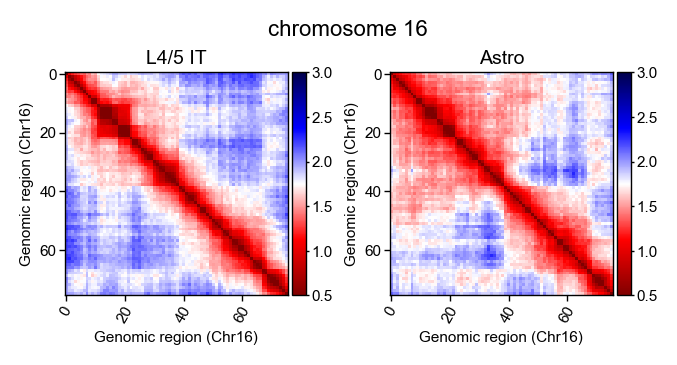

In [23]:
%matplotlib inline
plt.rcParams['axes.grid'] = False
from mpl_toolkits.axes_grid1 import make_axes_locatable


chosen_chrom = '16'
sel_chrom = f'chr{chosen_chrom}'


sel_group1 = 'L4/5 IT'
sel_group2 = 'Astro'


#####################################################################################################
# get distmap for the compared cell type pair
distMap_chr_group = {}
for _group in [sel_group1,sel_group2]:
    median_mat = class_2_medianDict[_group][f'cis_{chosen_chrom}']
    
    
    if normalize_btw_celltype:
        common_mat = class_2_medianDict[common_celltype][f'cis_{sel_chr}']
        if norm_btw_celltype_method =='regression':
            median_mat = normalize_map_byPoly (median_mat,common_mat, deg_norm = 1, norm_scale ='linear')
        elif norm_btw_celltype_method =='median':
            median_ratio = np.nanmedian(median_mat)/np.nanmedian(common_mat)
            median_mat = median_mat / median_ratio
        
    distMap_chr_group[_group] = median_mat

    
###################################################################
# plot distmap
fig, axes = plt.subplots(1, len(distMap_chr_group.keys()), figsize=(_page_width/3.5*1*len(distMap_chr_group.keys()), 
                                                          _page_width/3.5*1.1), dpi=200, sharex=True, sharey=True)

for _idx, _group in enumerate(distMap_chr_group.keys()):
    
    cis_mat_chr = distMap_chr_group[_group]
    
    shared_color_limit= True
    if shared_color_limit:
        color_limits_class = [0.5, 3]
    else:
        pass
    
    ia.figure_tools.distmap.plot_distance_map(cis_mat_chr, color_limits=color_limits_class,
                                              ax=axes[_idx], 
                                            ticks=[i for i in np.arange(0,len(cis_mat_chr)) if i%20==0],
                                              tick_labels=[i for i in np.arange(0,len(cis_mat_chr)) if i%20==0],
                                                #ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                              #tick_labels=chr_names,
                                              #color_norm='log',
                                              ax_label=f'Genomic region (Chr{chosen_chrom})', 
                                              cmap='seismic_r',
                                              font_size=_font_size-1.5)
    
    axes[_idx].grid(False)
    #axes[_idx].grid(True,color='g', linestyle='-', linewidth=0.5)
    axes[_idx].set_title(f'{_group}', fontsize=_font_size, pad=3)
    

for _ax in axes:
    _ax.xaxis.set_tick_params(which='both', labelbottom=True)
    _ax.yaxis.set_tick_params(which='both', labelleft=True)

fig.subplots_adjust(wspace=0.35, hspace=0.35, left=0.05, right=0.95, top=0.97, bottom=0.02)
fig.suptitle(f"chromosome {chosen_chrom}", fontsize=_font_size+1, y=0.97)

plt.savefig(os.path.join(output_figure_folder, f'cis-distmap_across_celltypes_chr{chosen_chrom}_for_change.pdf'), 
        transparent=True, dpi=300, bbox_inches='tight')

fig.show()

### with local difference

meta NOT subset; don't know how to subset; dropped


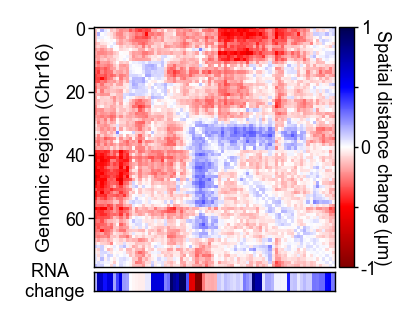

In [24]:
%matplotlib inline
plt.rcParams['axes.grid'] = False
from mpl_toolkits.axes_grid1 import make_axes_locatable

plot_AB = False
plot_RNA = True

chosen_chrom = '16'
sel_chrom = f'chr{chosen_chrom}'


sel_group1 = 'L4/5 IT'
sel_group2 = 'Astro'

#####################################################################################################
# get distmap for the compared cell type pair
distMap_chr_group = {}
for _group in [sel_group1,sel_group2]:
    median_mat = class_2_medianDict[_group][f'cis_{chosen_chrom}']

    if normalize_btw_celltype:
        common_mat = class_2_medianDict[common_celltype][f'cis_{sel_chr}']
        if norm_btw_celltype_method =='regression':
            median_mat = normalize_map_byPoly (median_mat,common_mat, deg_norm = 1, norm_scale ='linear')
        elif norm_btw_celltype_method =='median':
            median_ratio = np.nanmedian(median_mat)/np.nanmedian(common_mat)
            median_mat = median_mat / median_ratio
        
    distMap_chr_group[_group] = median_mat

# subtract distmap
distMap_chr_group_dif = distMap_chr_group[sel_group2] - distMap_chr_group[sel_group1]
sel_chrom = f'chr{chosen_chrom}'
# if masking the short-range locus pairs where the absolute differences are too small to see
if mask_shortrange:
    gdist_mat_chr = gdist_mat_dict[chosen_chrom]
    valid_mask = gdist_mat_chr > g_cutoff
    distMap_chr_group_dif[~valid__mask]=np.nan
 
    
    
# calculate RNA value change
rna_vals_group = {}
for _group_idx, _group in enumerate([sel_group1,sel_group2]):
    rna_summary_df_group  = ref_measure_dict_byGroup[_group]
    rna_summary_df_chr_group = rna_summary_df_group[rna_summary_df_group.index.str.contains(f'chr{chosen_chrom}_')]
    rna_vals = np.array(rna_summary_df_chr_group['mean_rna_2X_2000kb'].tolist())
    # normalize to 0-1
    if normalize_RNA:
        rna_vals = np.array([(i-min(rna_vals))/(max(rna_vals)-min(rna_vals)) for i in rna_vals])
    rna_vals_group[_group] = rna_vals
    
rna_vals_group_dif = rna_vals_group[sel_group2] - rna_vals_group[sel_group1]



#######################################################################################

from matplotlib.colors import Normalize
import matplotlib.cm as cm

# plot for distance change
dist_change_th = 1
vmin = -dist_change_th
vmax = dist_change_th
# colorscale for dist
dist_cmap = cm.get_cmap('seismic_r').copy()
dist_cmap.set_bad(color=[0.5,0.5,0.5,0.5])   

fig, ax1 = plt.subplots(figsize=(_page_width/3.2,_page_width/3.2), dpi=200)

_pf = ax1.imshow(distMap_chr_group_dif, 
           cmap=dist_cmap,
           vmin=vmin,
           vmax=vmax
          )

ax1.tick_params('both', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=False, labelbottom=False)

ax1.set_ylabel(f"Genomic region (Chr{chosen_chrom})", fontsize = 7)
ax1.tick_params('both', labelsize=_font_size-0.5, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)


# colorbar ax
cax = divider.append_axes('right', size='6%', pad="2%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[vmin, vmin/2, 0.0, vmax/2, vmax])
cbar.ax.set_yticklabels([str(vmin), '', '0', '', str(vmax)])
cbar.ax.tick_params('both', labelsize=_font_size-0.5, 
                width=_ticklabel_width, length=_ticklabel_size-0.5,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]
#cbar.set_ticks([vmin,vmax])
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Spatial distance change (\u03BCm)',
               fontsize=_font_size-0.5, labelpad=5, rotation=270)
cbar.ax.minorticks_off()

#######################################################################################
# plot for RNA
if plot_RNA:
    # colorscale for RNA
    rna_change_th = 50
    rna_vmin = -rna_change_th
    rna_vmax = rna_change_th
    
    cmap = cm.get_cmap('seismic')
    # normalize the values for colormap
    norm = Normalize(vmin=rna_vmin, vmax=rna_vmax)
    norm_values = norm(rna_vals_group_dif)
    
    rna_bot_ax = divider.append_axes('bottom', size='8%', pad="2%", 
                                 sharex=ax1, xticks=[])
    _pf1 = rna_bot_ax.bar(np.arange(0,len(rna_vals_group_dif)),
                   1*(len(rna_vals_group_dif)), color=cmap(norm_values), width=1, bottom=-1)
    
    rna_bot_ax.tick_params('x', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
    rna_bot_ax.tick_params('y', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
    rna_bot_ax.set_ylabel(f'RNA \n change', fontsize=_font_size-0.5, rotation = 0, labelpad=15, y=-0.5)   
    [i[1].set_linewidth(_ticklabel_width) for i in rna_bot_ax.spines.items()]
    

#####################################################################################################
# plot for A/B
if plot_AB:
    AB_id_chr = AB_summary_df[AB_summary_df.index.str.contains(f'chr{chosen_chrom}_')]
    for _group_idx, _group in enumerate([sel_group1,sel_group2]):
        AB_id_chr_group  = AB_id_chr[_group]
        
        bot_ax = divider.append_axes('bottom', size='10%', pad="1%", 
                                     sharex=ax1, xticks=[])
        bot_ax.bar(np.where(AB_id_chr_group=='A')[0], 1, color='red', width=1, bottom=0)
        bot_ax.bar(np.where(AB_id_chr_group=='B')[0], 1,color='blue', width=1, bottom=0)

        bot_ax.tick_params('x', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
        bot_ax.tick_params('y', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
        bot_ax.set_ylabel(f'{_group}', fontsize=_font_size-0.5, rotation = 0, labelpad=11,  loc='center')
        [i[1].set_linewidth(_ticklabel_width) for i in bot_ax.spines.items()]

    #ax.grid(False)
    
sel_group1=sel_group1.replace('/','_').replace(' ','_')
sel_group2=sel_group2.replace('/','_').replace(' ','_')
#plt.tight_layout()
plt.savefig(os.path.join(output_figure_folder, f"distmap_change_from_{sel_group1}_to_{sel_group2}_chr{chosen_chrom}.pdf"),
                transparent=True, bbox_inches='tight', dpi=300)
plt.show()

### wo local difference

meta NOT subset; don't know how to subset; dropped


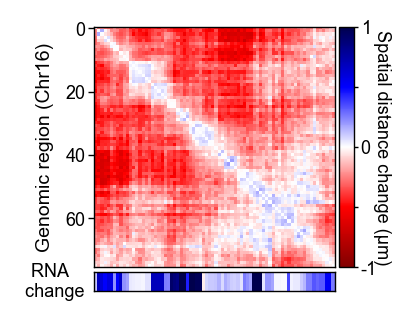

In [25]:
%matplotlib inline
plt.rcParams['axes.grid'] = False
from mpl_toolkits.axes_grid1 import make_axes_locatable

plot_AB = False
plot_RNA = True

chosen_chrom = '16'
sel_chrom = f'chr{chosen_chrom}'


sel_group1 = 'L4/5 IT'
sel_group2 = 'Oligo'

#####################################################################################################
# get distmap for the compared cell type pair
distMap_chr_group = {}
for _group in [sel_group1,sel_group2]:
    median_mat = class_2_medianDict[_group][f'cis_{chosen_chrom}']

    if normalize_btw_celltype:
        common_mat = class_2_medianDict[common_celltype][f'cis_{sel_chr}']
        if norm_btw_celltype_method =='regression':
            median_mat = normalize_map_byPoly (median_mat,common_mat, deg_norm = 1, norm_scale ='linear')
        elif norm_btw_celltype_method =='median':
            median_ratio = np.nanmedian(median_mat)/np.nanmedian(common_mat)
            median_mat = median_mat / median_ratio
        
    distMap_chr_group[_group] = median_mat

# subtract distmap
distMap_chr_group_dif = distMap_chr_group[sel_group2] - distMap_chr_group[sel_group1]
sel_chrom = f'chr{chosen_chrom}'
# if masking the short-range locus pairs where the absolute differences are too small to see
if mask_shortrange:
    gdist_mat_chr = gdist_mat_dict[chosen_chrom]
    valid_mask = gdist_mat_chr > g_cutoff
    distMap_chr_group_dif[~valid__mask]=np.nan
 
    
    
# calculate RNA value change
rna_vals_group = {}
for _group_idx, _group in enumerate([sel_group1,sel_group2]):
    rna_summary_df_group  = ref_measure_dict_byGroup[_group]
    rna_summary_df_chr_group = rna_summary_df_group[rna_summary_df_group.index.str.contains(f'chr{chosen_chrom}_')]
    rna_vals = np.array(rna_summary_df_chr_group['mean_rna_2X_2000kb'].tolist())
    # normalize to 0-1
    if normalize_RNA:
        rna_vals = np.array([(i-min(rna_vals))/(max(rna_vals)-min(rna_vals)) for i in rna_vals])
    rna_vals_group[_group] = rna_vals
    
rna_vals_group_dif = rna_vals_group[sel_group2] - rna_vals_group[sel_group1]



#######################################################################################

from matplotlib.colors import Normalize
import matplotlib.cm as cm

# plot for distance change
dist_change_th = 1
vmin = -dist_change_th
vmax = dist_change_th
# colorscale for dist
dist_cmap = cm.get_cmap('seismic_r').copy()
dist_cmap.set_bad(color=[0.5,0.5,0.5,0.5])   

fig, ax1 = plt.subplots(figsize=(_page_width/3.2,_page_width/3.2), dpi=200)

_pf = ax1.imshow(distMap_chr_group_dif, 
           cmap=dist_cmap,
           vmin=vmin,
           vmax=vmax
          )

ax1.tick_params('both', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=False, labelbottom=False)

ax1.set_ylabel(f"Genomic region (Chr{chosen_chrom})", fontsize = 7)
ax1.tick_params('both', labelsize=_font_size-0.5, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)


# colorbar ax
cax = divider.append_axes('right', size='6%', pad="2%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[vmin, vmin/2, 0.0, vmax/2, vmax])
cbar.ax.set_yticklabels([str(vmin), '', '0', '', str(vmax)])
cbar.ax.tick_params('both', labelsize=_font_size-0.5, 
                width=_ticklabel_width, length=_ticklabel_size-0.5,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]
#cbar.set_ticks([vmin,vmax])
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Spatial distance change (\u03BCm)',
               fontsize=_font_size-0.5, labelpad=5, rotation=270)
cbar.ax.minorticks_off()

#######################################################################################
# plot for RNA
if plot_RNA:
    # colorscale for RNA
    rna_change_th = 50
    rna_vmin = -rna_change_th
    rna_vmax = rna_change_th
    
    cmap = cm.get_cmap('seismic')
    # normalize the values for colormap
    norm = Normalize(vmin=rna_vmin, vmax=rna_vmax)
    norm_values = norm(rna_vals_group_dif)
    
    rna_bot_ax = divider.append_axes('bottom', size='8%', pad="2%", 
                                 sharex=ax1, xticks=[])
    _pf1 = rna_bot_ax.bar(np.arange(0,len(rna_vals_group_dif)),
                   1*(len(rna_vals_group_dif)), color=cmap(norm_values), width=1, bottom=-1)
    
    rna_bot_ax.tick_params('x', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
    rna_bot_ax.tick_params('y', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
    rna_bot_ax.set_ylabel(f'RNA \n change', fontsize=_font_size-0.5, rotation = 0, labelpad=15, y=-0.5)   
    [i[1].set_linewidth(_ticklabel_width) for i in rna_bot_ax.spines.items()]
    

#####################################################################################################
# plot for A/B
if plot_AB:
    AB_id_chr = AB_summary_df[AB_summary_df.index.str.contains(f'chr{chosen_chrom}_')]
    for _group_idx, _group in enumerate([sel_group1,sel_group2]):
        AB_id_chr_group  = AB_id_chr[_group]
        
        bot_ax = divider.append_axes('bottom', size='10%', pad="1%", 
                                     sharex=ax1, xticks=[])
        bot_ax.bar(np.where(AB_id_chr_group=='A')[0], 1, color='red', width=1, bottom=0)
        bot_ax.bar(np.where(AB_id_chr_group=='B')[0], 1,color='blue', width=1, bottom=0)

        bot_ax.tick_params('x', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
        bot_ax.tick_params('y', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
        bot_ax.set_ylabel(f'{_group}', fontsize=_font_size-0.5, rotation = 0, labelpad=11,  loc='center')
        [i[1].set_linewidth(_ticklabel_width) for i in bot_ax.spines.items()]

    #ax.grid(False)
    
sel_group1=sel_group1.replace('/','_').replace(' ','_')
sel_group2=sel_group2.replace('/','_').replace(' ','_')
#plt.tight_layout()
plt.savefig(os.path.join(output_figure_folder, f"distmap_change_from_{sel_group1}_to_{sel_group2}_chr{chosen_chrom}.pdf"),
                transparent=True, bbox_inches='tight', dpi=300)
plt.show()